# Insurance Claims- Fraud Detection
Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Import the Dependencies

In [50]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Importing Dataset

In [51]:
insurance_fraud=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
insurance_fraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

## Understanding Data

In [52]:
insurance_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [53]:
# data description
insurance_fraud.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [54]:
# checking for Duplicate values
insurance_fraud.duplicated().sum()

0

In [55]:
# unique values in  columns
object_columns = insurance_fraud.select_dtypes(include=['object']).columns
for column in object_columns:
  print("\n",column)                                # column name
  print(insurance_fraud[column].value_counts())           # Value Count
  print(insurance_fraud[column].unique())                 # unique values


 policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '1

## police_report_available,property_damage,collision_type  have '?' in them which is needed to be delt with

In [56]:
object_columns 

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

## EDA
### univariate analysis

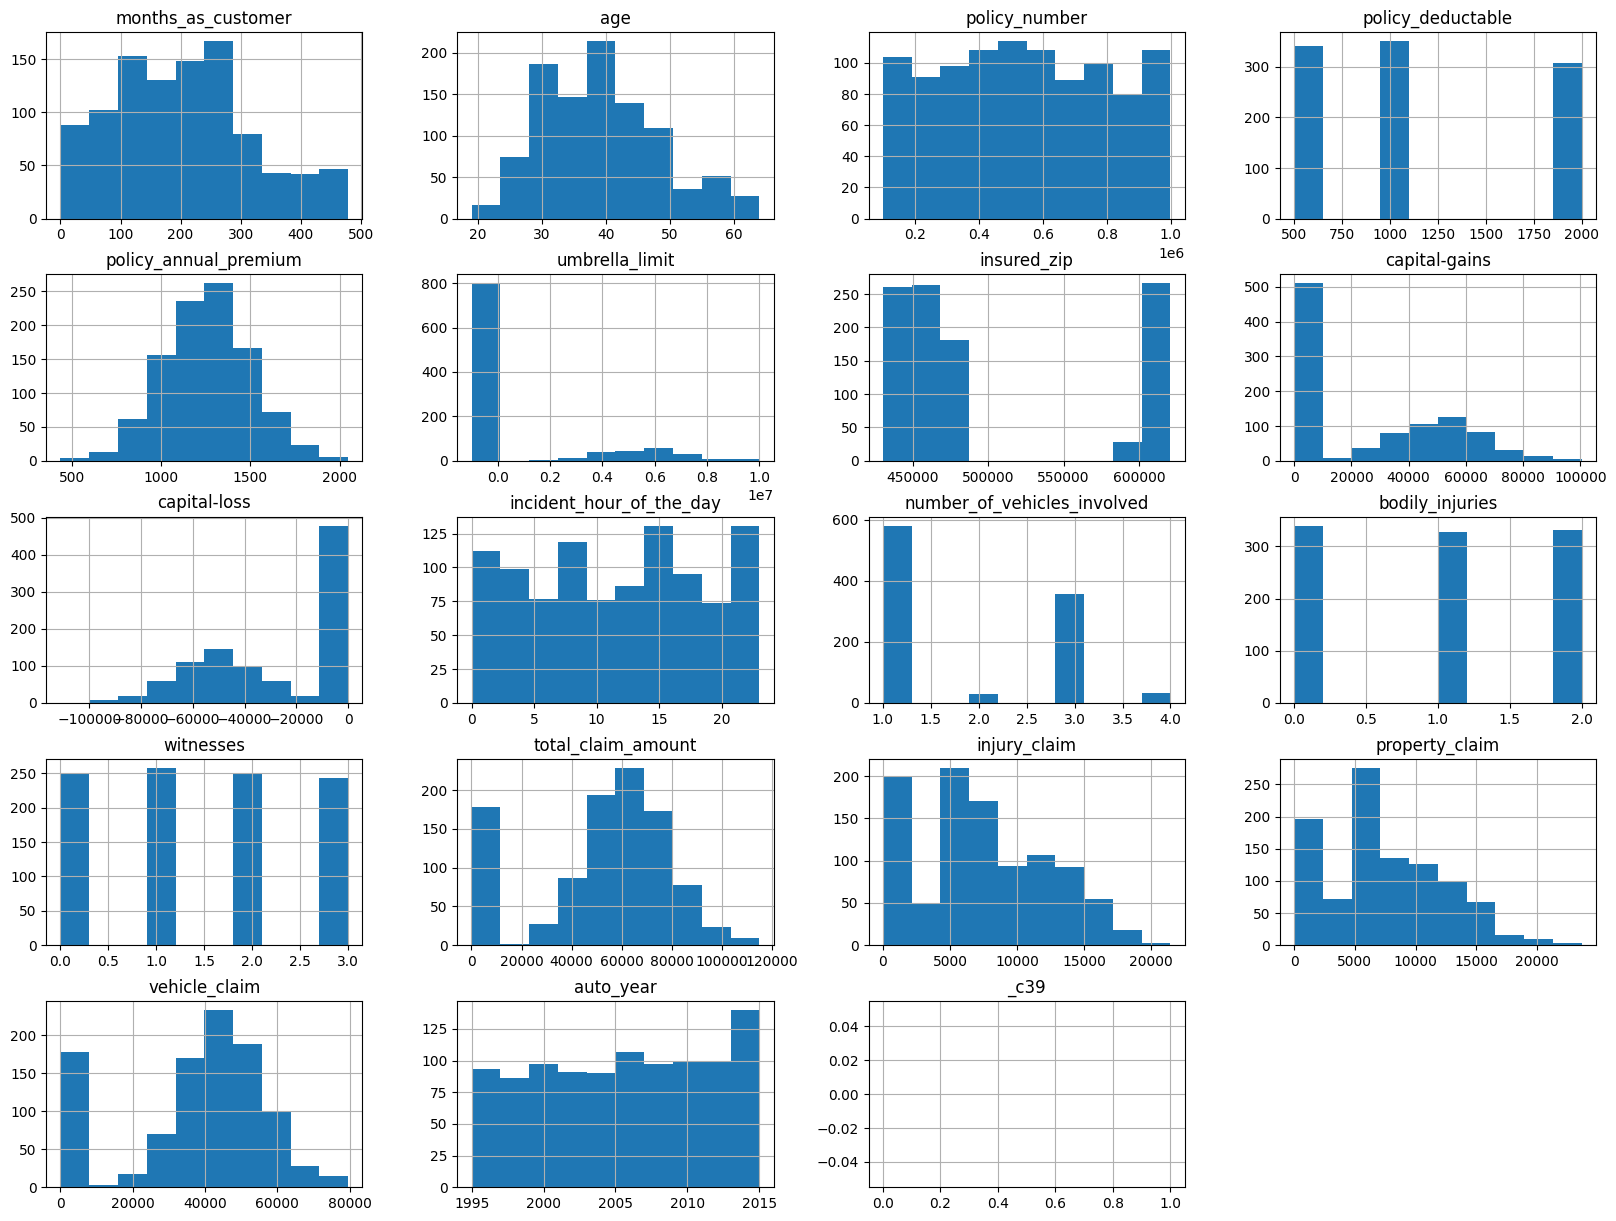

In [57]:
## plot histogram for numeric columns
insurance_fraud.hist(figsize=(20,15))
plt.show()

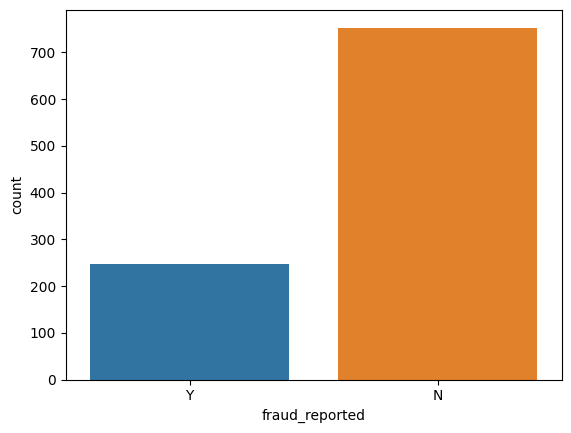

In [58]:
# Fraud reported
sns.countplot(x='fraud_reported',data=insurance_fraud)

### most fraud are not reported

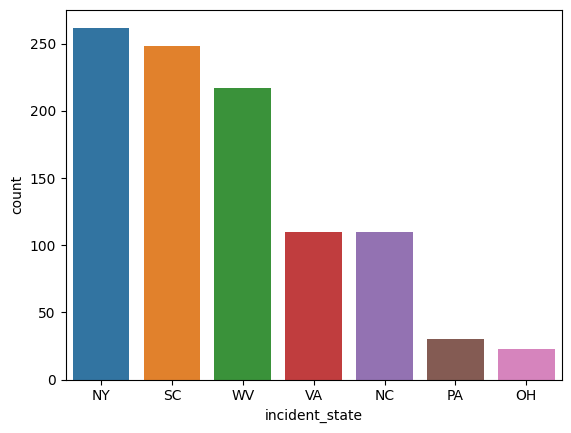

In [59]:
# incident_state
sns.countplot(x='incident_state',data=insurance_fraud,order = insurance_fraud['incident_state'].value_counts().index)

### most accident occur in NY,SC,WH

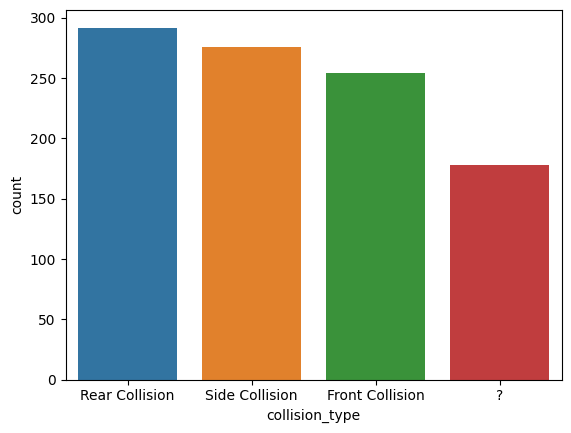

In [60]:
# 'collision_type'
sns.countplot(x='collision_type',data=insurance_fraud,order = insurance_fraud['collision_type'].value_counts().index)

### Most collision are Rear

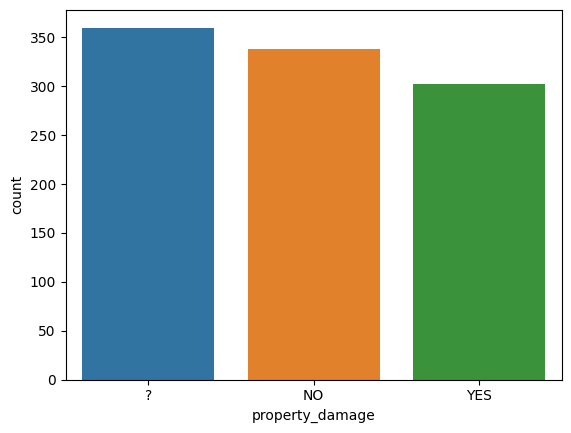

In [61]:
# property_damage
sns.countplot(x='property_damage',data=insurance_fraud,order = insurance_fraud['property_damage'].value_counts().index)

### Most of the time demage to property is unknown

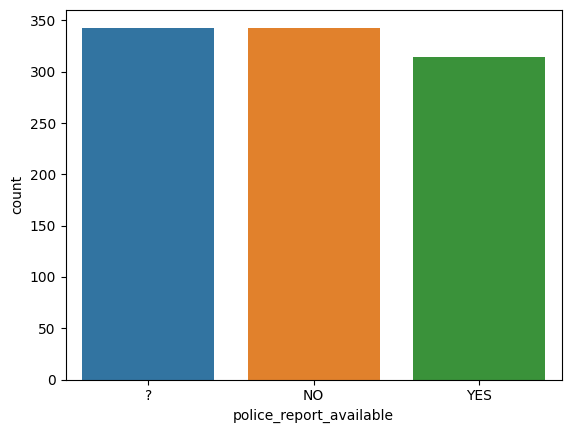

In [62]:
# police_report_available
sns.countplot(x='police_report_available',data=insurance_fraud,order = insurance_fraud['police_report_available'].value_counts().index)

### Most of the time police report availability is unknown

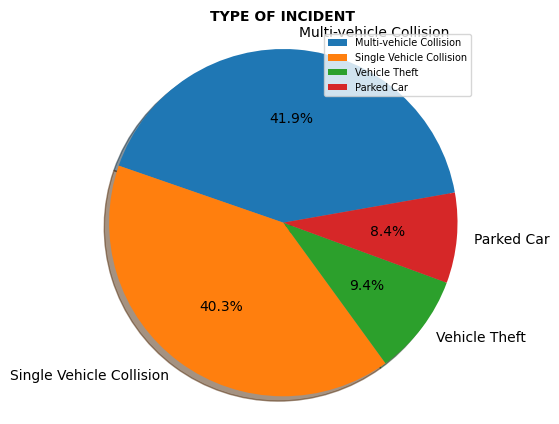

In [63]:

# Creating a pie chart for incident_type
incident_type = insurance_fraud['incident_type'].value_counts()

plt.style.use('default')
plt.figure(figsize=(5,5))
plt.pie(incident_type.values, labels=incident_type.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('TYPE OF INCIDENT', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

### mostly it is Multi-vehicle collision

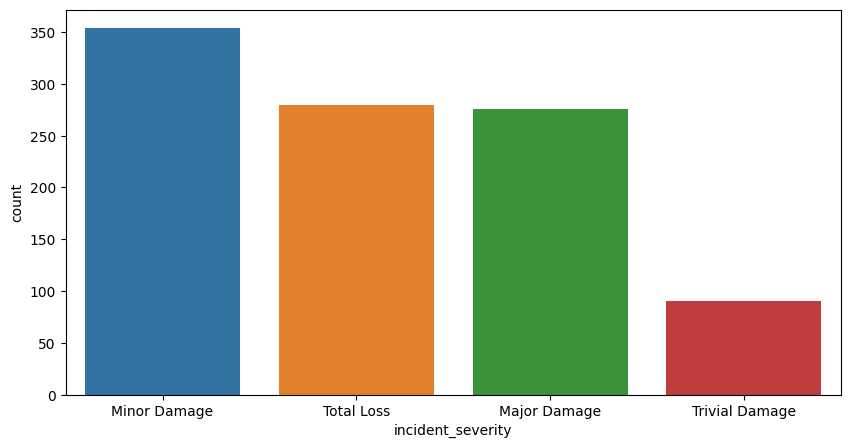

In [64]:
# incident_severity
plt.subplots(figsize=(10, 5))
sns.countplot(x='incident_severity',data=insurance_fraud,order = insurance_fraud['incident_severity'].value_counts().index)

### Mostly minor damages are Occuring

## Bi variate Analysis

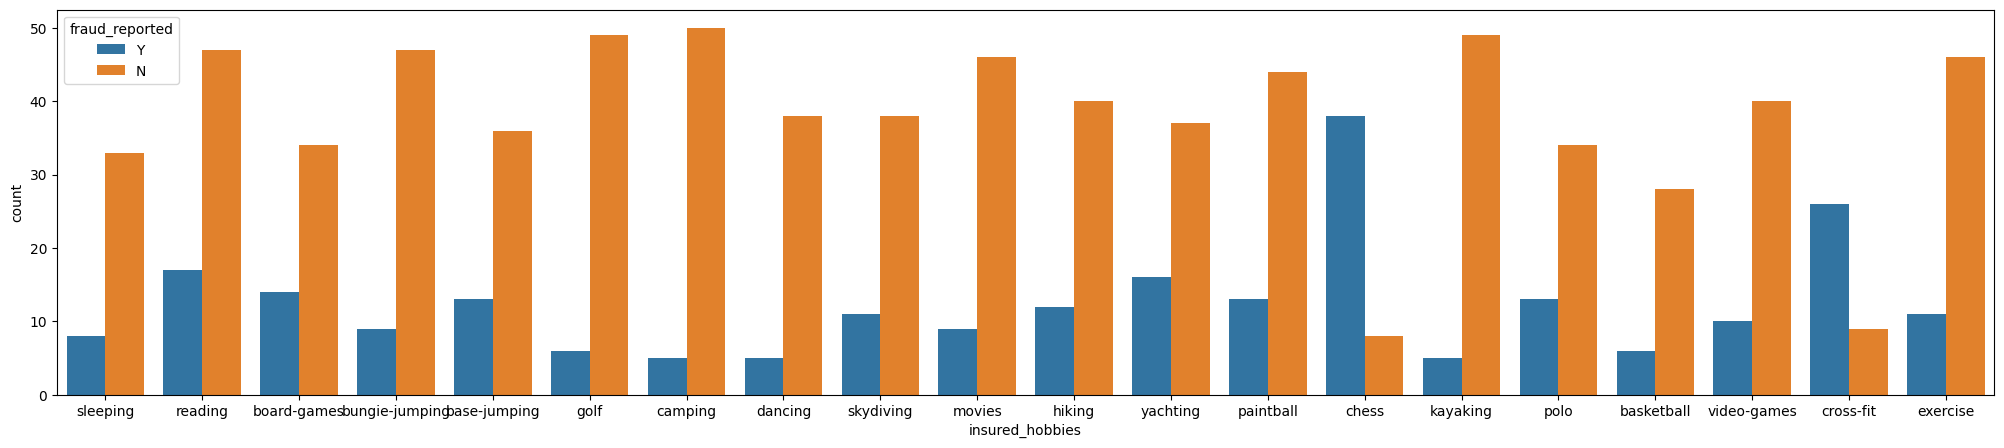

In [65]:
f, ax = plt.subplots(figsize=(25, 5))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=insurance_fraud)

## chess and crossfit hobby person are most likely to commit a insurance fraud

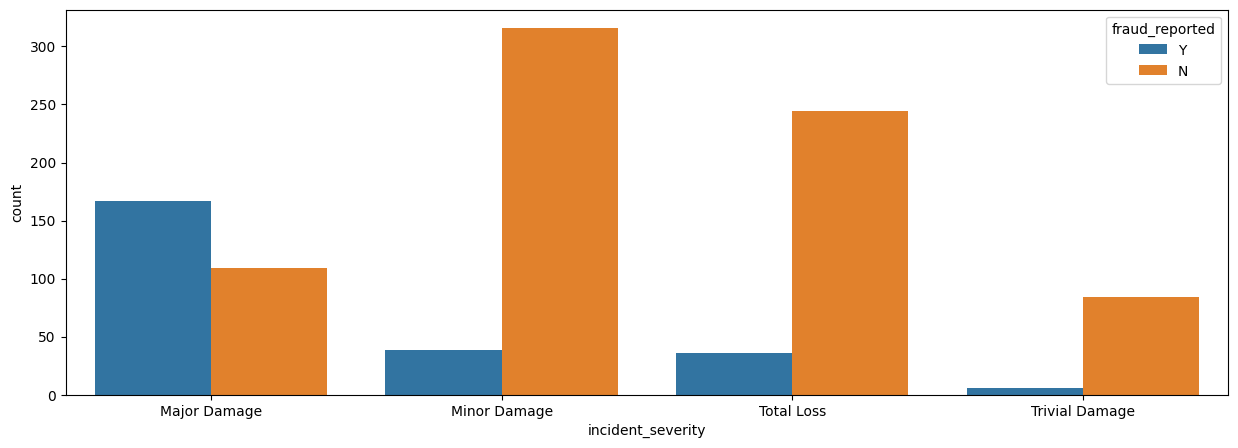

In [66]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='incident_severity',hue='fraud_reported',data=insurance_fraud)

### Indicates that people tend to commit Insuarance fraud in a major damage cases

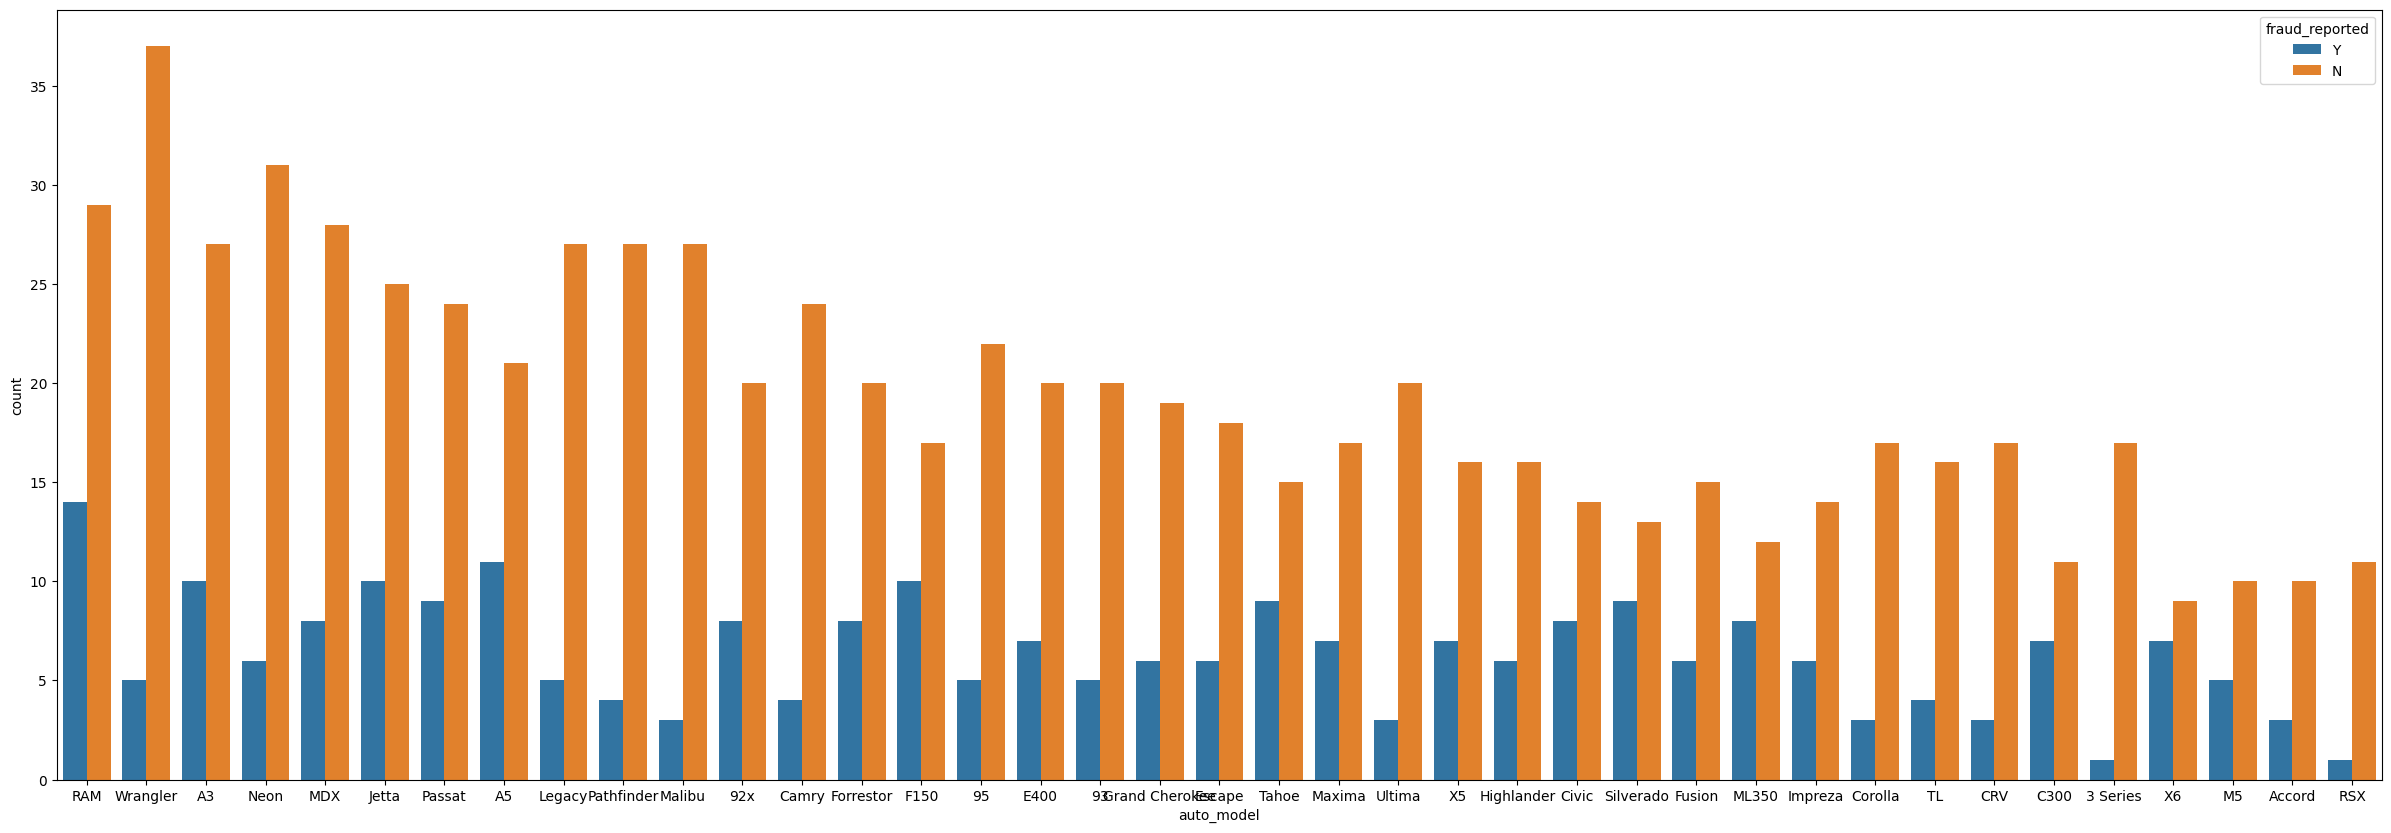

In [67]:
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x='auto_model',hue='fraud_reported',data=insurance_fraud, order = insurance_fraud['auto_model'].value_counts().index)

###  Least ford in auto model RSX and 3 Series

### Multivariate Analysis

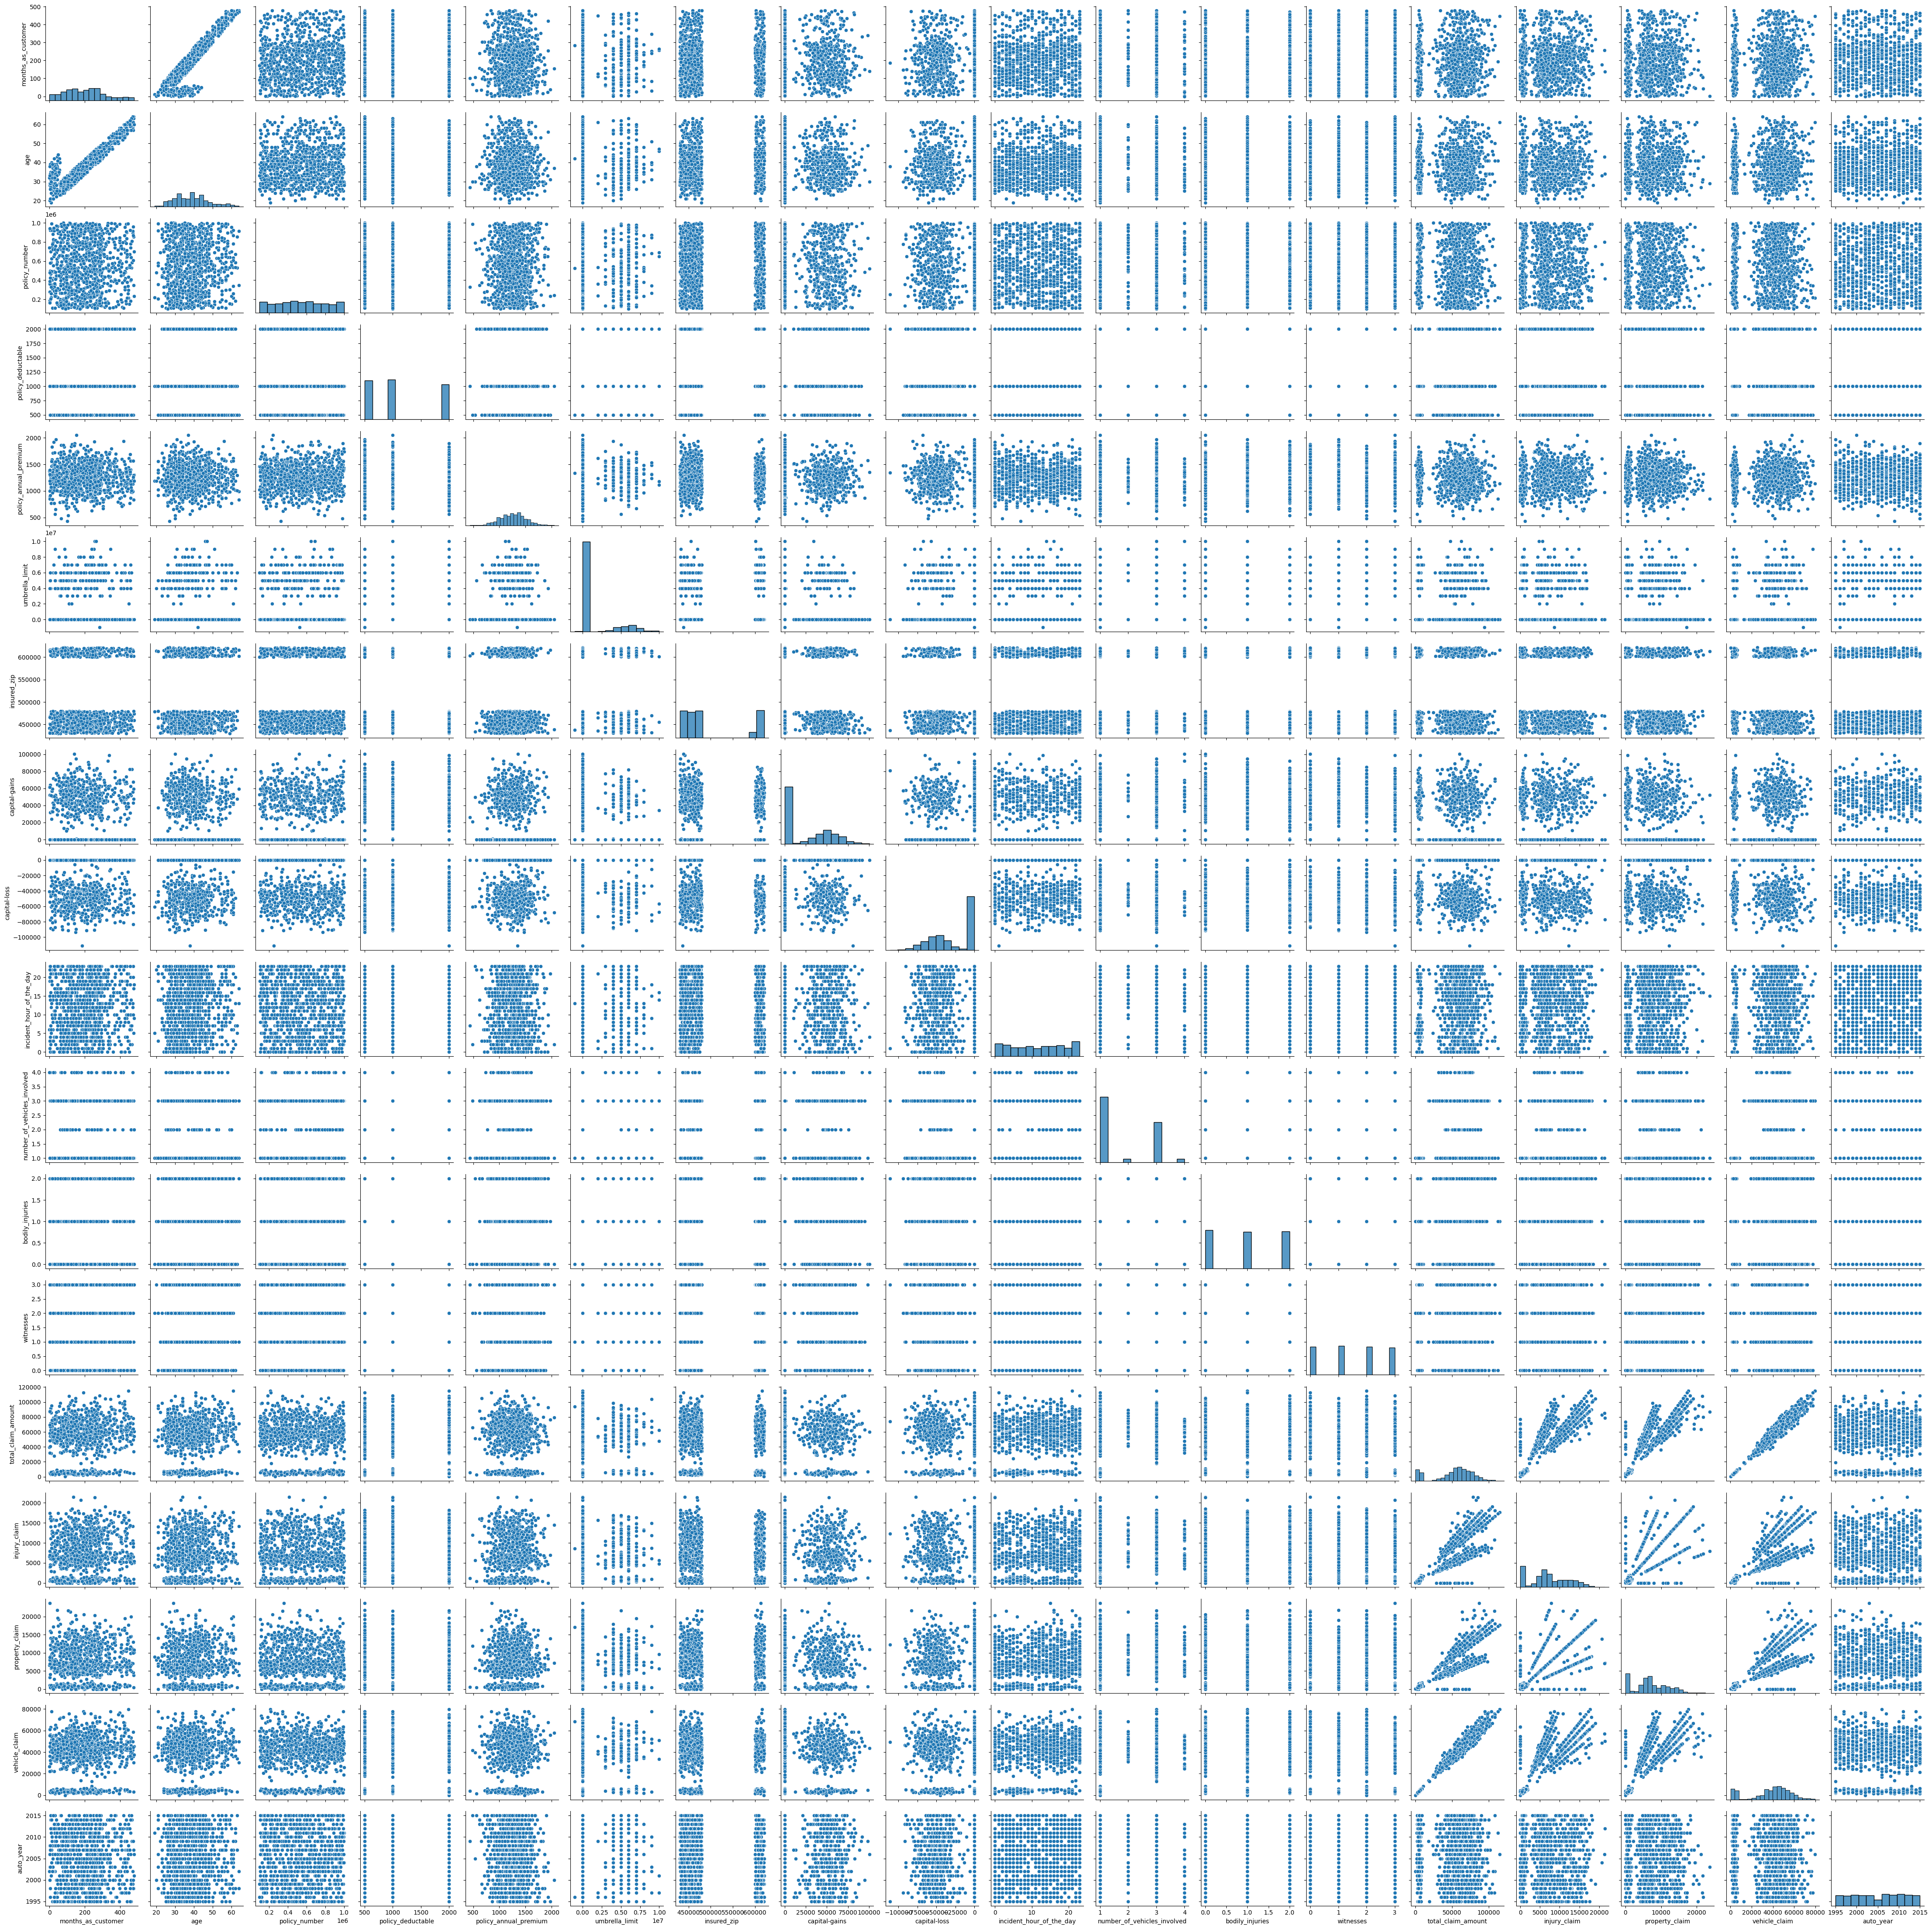

In [ ]:
# Creating a pairplot of dataset
sns.pairplot(insurance_fraud)
plt.show()

# Data Preprocessing

In [68]:
insurance_fraud.auto_year.unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013])

In [69]:
insurance_fraud['vehicle_age'] = 2018 - insurance_fraud['auto_year'] # the age of the vehicle based on the year value 

In [70]:
# removing the column to aviod multi-collinearity
insurance_fraud.drop('auto_year',axis=1,inplace=True)

In [71]:
insurance_fraud['date']=0
insurance_fraud['month']=0
## change incident date to date and time
for i in range(1000):
  insurance_fraud['date'][i]=insurance_fraud['incident_date'][i][:2]
  insurance_fraud['month'][i]=insurance_fraud['incident_date'][i][3:5]

In [72]:
# removing the column to aviod multi-collinearity
insurance_fraud.drop('incident_date',axis=1,inplace=True)

In [73]:
## dealing with ? 

insurance_fraud['police_report_available'] = insurance_fraud['police_report_available'].str.replace('?', 'Unknown')
insurance_fraud['property_damage'] = insurance_fraud['property_damage'].str.replace('?', 'Unknown')
insurance_fraud['collision_type'] = insurance_fraud['collision_type'].str.replace('?', 'Unknown')

In [74]:
insurance_fraud['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2])

In [75]:
 # Factorize according to the time period of the day.
sections = [-1, 3, 6, 9, 12, 17, 20, 24] 
time= ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
insurance_fraud['incident_time_of_day'] = pd.cut(insurance_fraud.incident_hour_of_the_day, sections , labels=time).astype(object)
insurance_fraud[['incident_hour_of_the_day', 'incident_time_of_day']].head(20)

# removing the column to aviod multi-collinearity
insurance_fraud.drop('incident_hour_of_the_day',axis=1,inplace=True)

In [76]:
# dropping unimportant columns
insurance_fraud.drop(['policy_number','insured_zip','policy_bind_date','incident_location','_c39'],axis=1,inplace=True)

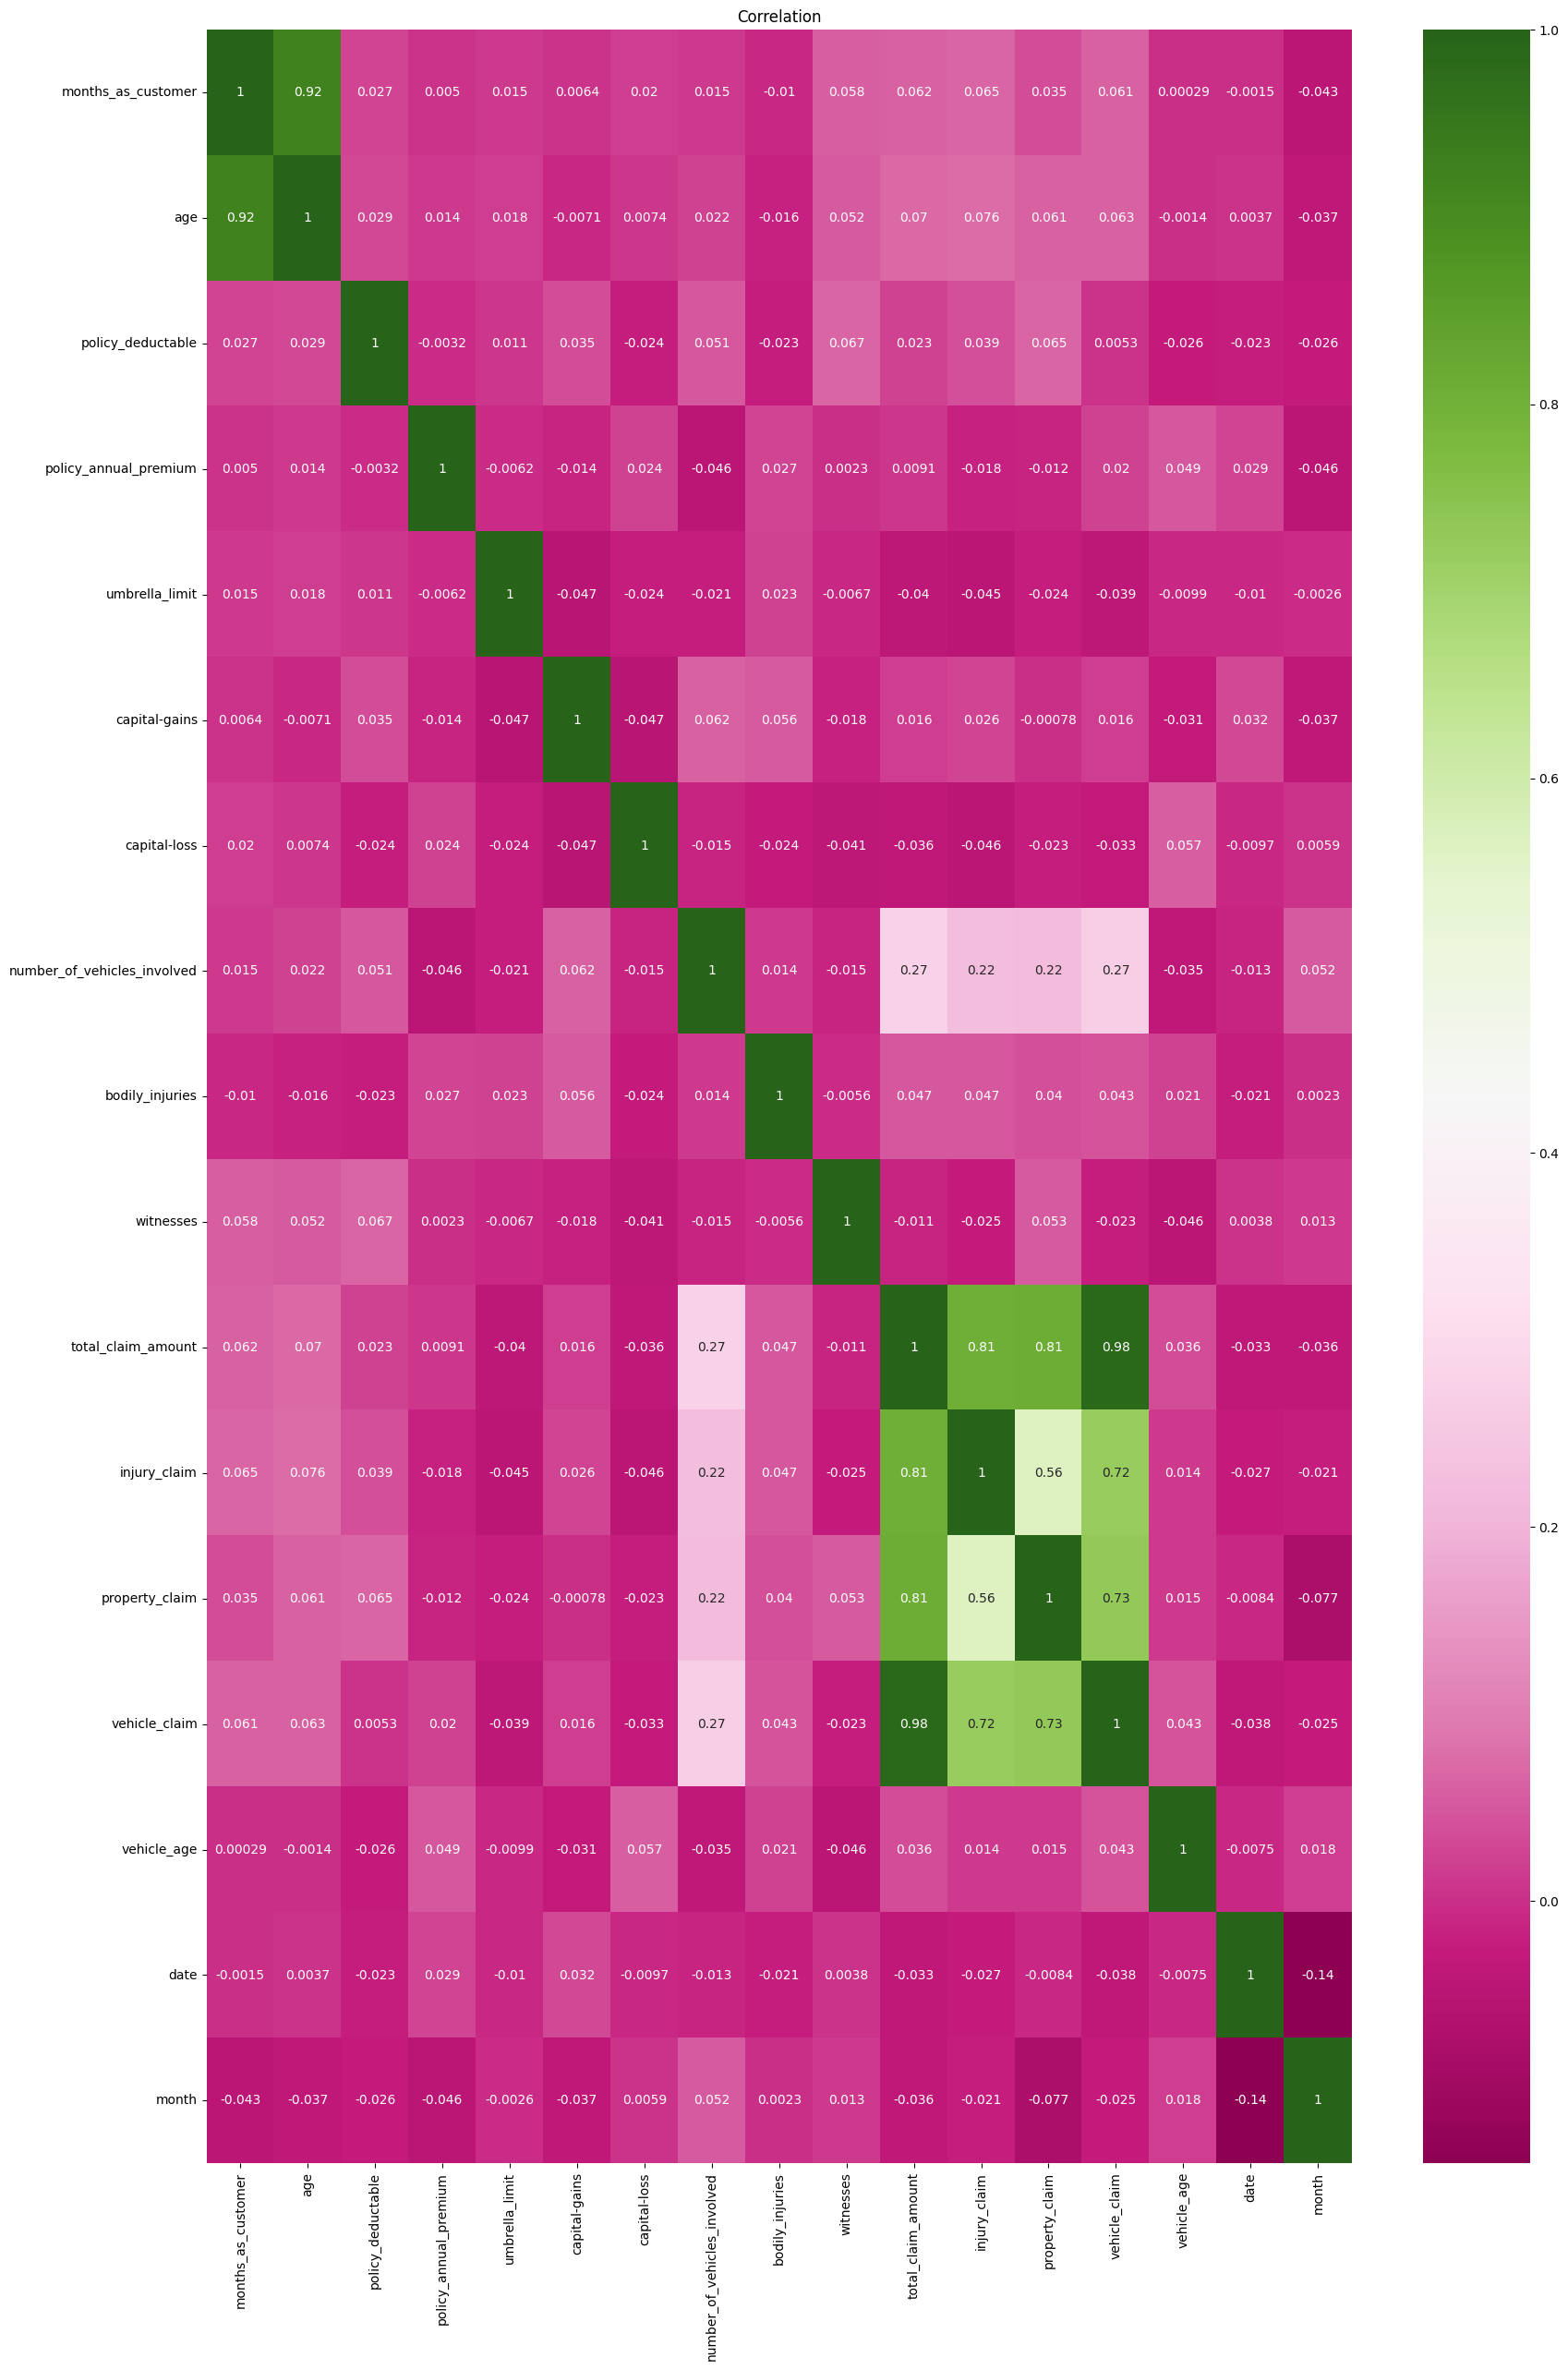

In [77]:
# Heat map
plt.figure(figsize = [20, 30])
sns.heatmap(insurance_fraud.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

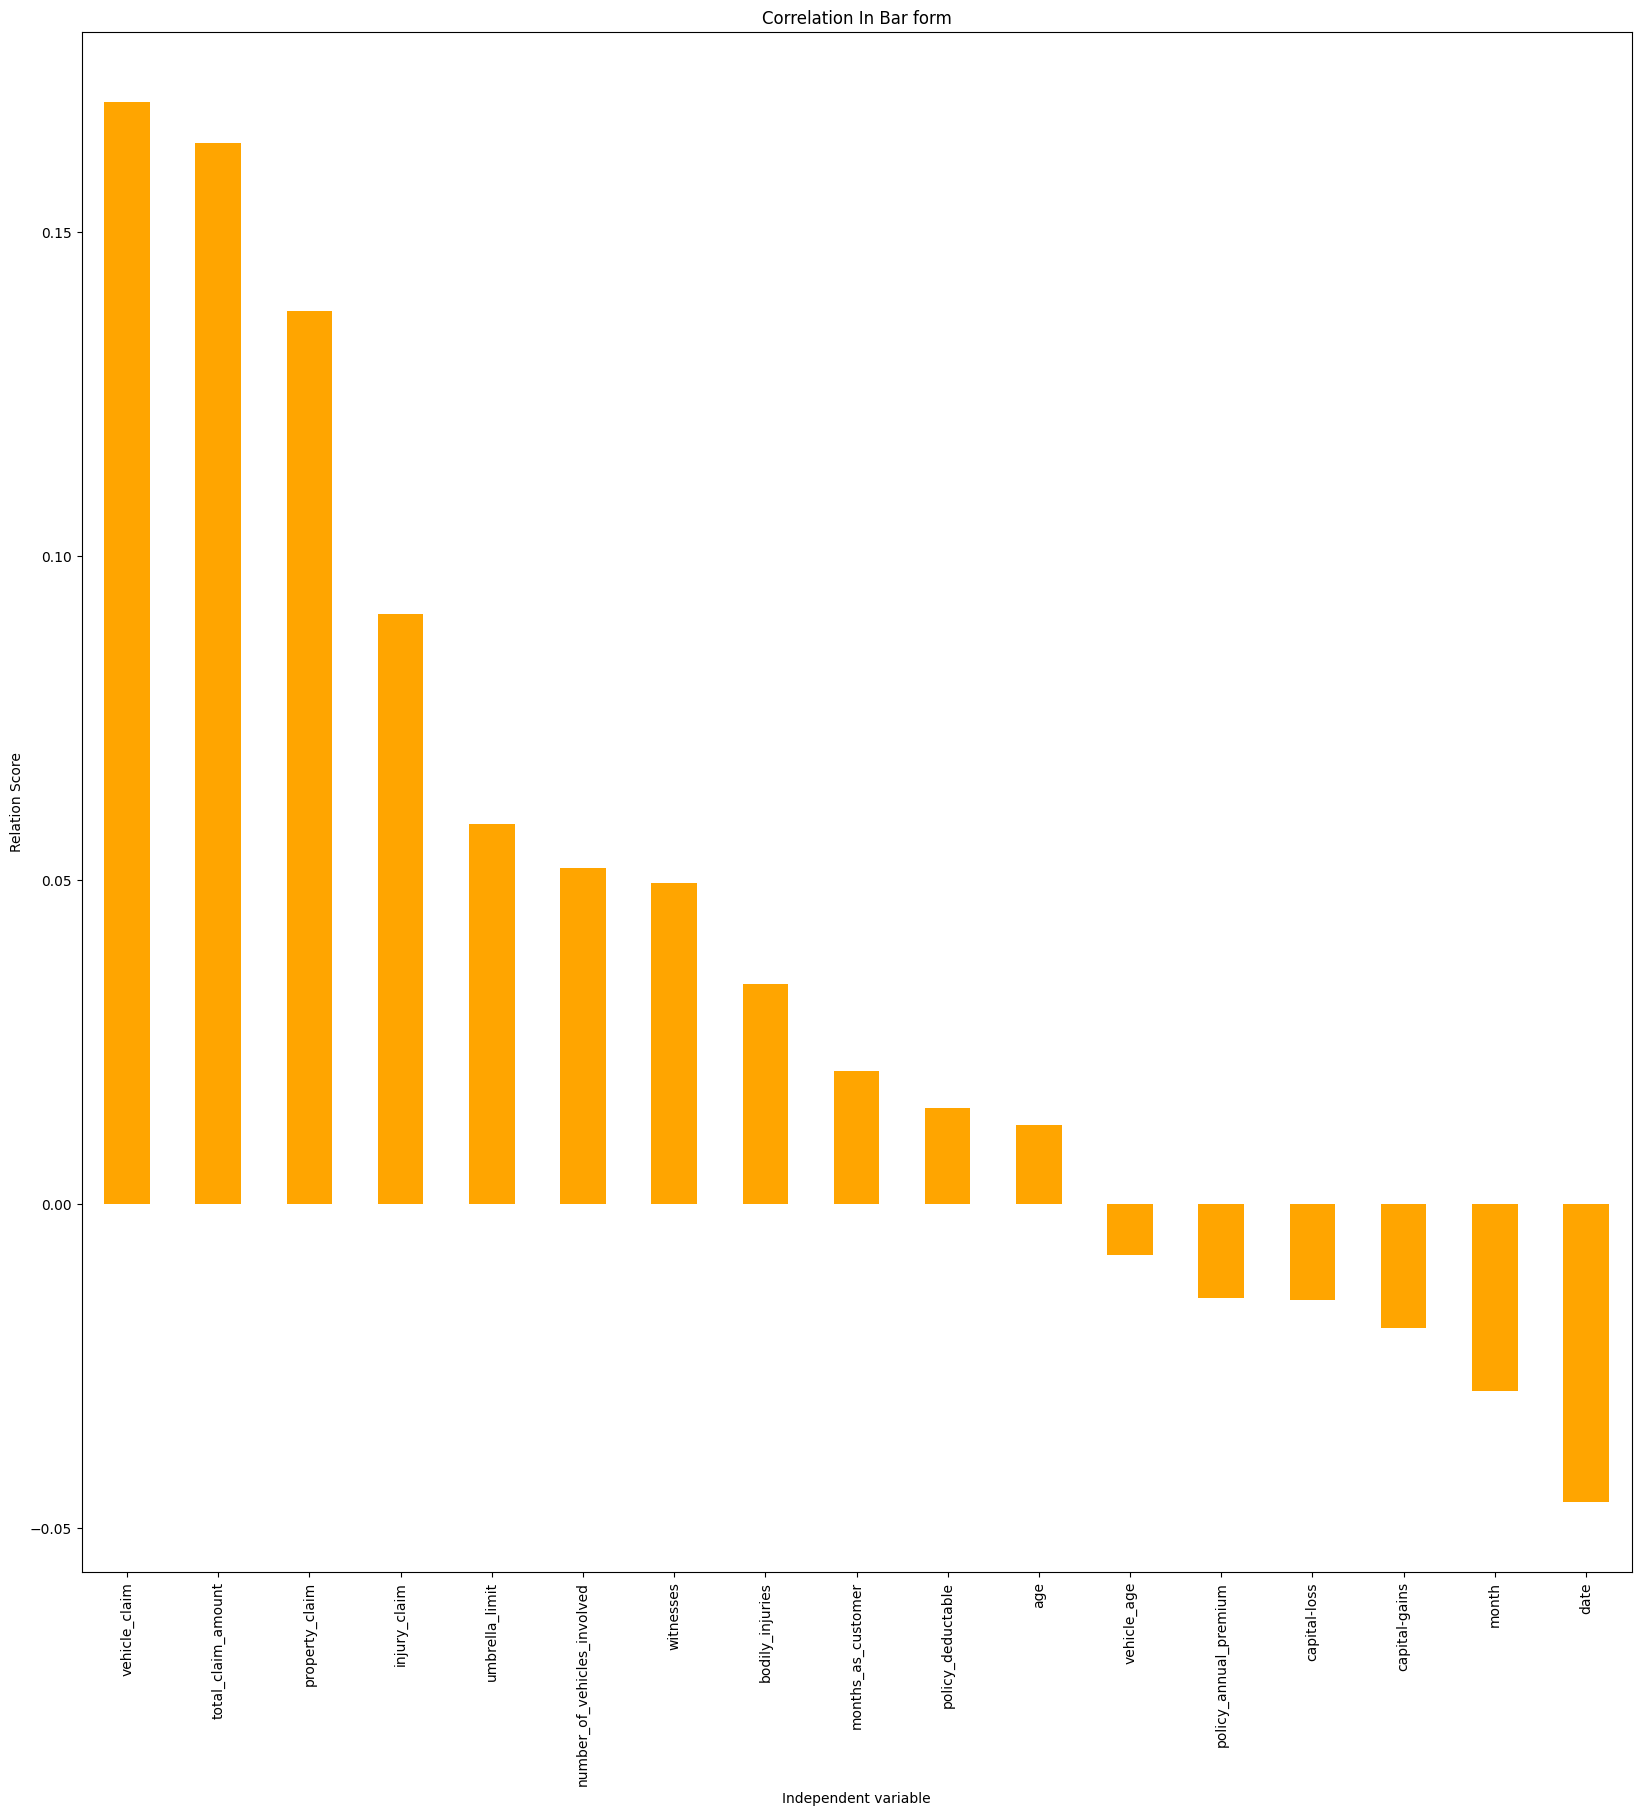

In [78]:
insurance_fraud.fraud_reported = insurance_fraud.fraud_reported.map( {'Y':1 , 'N':0} )
# relation of win with every column
plt.figure(figsize =(20, 20))
insurance_fraud.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind ='bar', color ='Orange')
plt.xlabel('Independent variable')
plt.ylabel('Relation Score')
plt.title('Correlation In Bar form')
plt.show()

In [79]:
# chcking for z- scores
list1=[]
from scipy.stats import zscore
for column in insurance_fraud.columns:
    if insurance_fraud[column].dtypes != 'object':
      list1.append(column)
      

list1

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'fraud_reported',
 'vehicle_age',
 'date',
 'month']

## Removing Outliers

In [80]:
from scipy.stats import zscore
z_score=np.abs(zscore(insurance_fraud[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']]))
# data with z score more then 3
data=insurance_fraud[(z_score<3).all(axis=1)]
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... injury_claim  \
0                        MD       craft-repair  ...         6510   
1                        MD  machine-op-inspct  ...          780   
2                       PhD              sales  ...         7700   
3                       PhD       armed-forces  ...         6340   
4                 Associate              sales  ...         1300   
..                      ...                ...  ...          ...   
995                 Masters       craft-repair  ...        17440   
996                     PhD     prof-specialty  ...        18080   
997                 Masters       armed-forces  ...         7500   
998               Associate  handlers-cleaners  ...         5220   
999               Associate              sales  ...          460   

    property_claim  vehicle_claim   auto_make auto_model fraud_reported  \
0            13020          52080        Saab        92x              1   
1              780           3510    Mercedes       E400              1   
2             3850          23100       Dodge        RAM              0   
3             6340          50720   Chevrolet      Tahoe              1   
4              650           4550      Accura        RSX              0   
..             ...            ...         ...        ...            ...   
995           8720          61040       Honda     Accord              0   
996          18080          72320  Volkswagen     Passat              0   
997           7500          52500      Suburu    Impreza              0   
998           5220          36540        Audi         A5              0   
999            920           3680    Mercedes       E400              0   

    vehicle_age date month incident_time_of_day  
0            14   25     1        early_morning  
1            11   21     1              morning  
2            11   22     2              morning  
3             4   10     1        early_morning  
4             9   17     2              evening  
..          ...  ...   ...                  ...  
995          12   22     2              evening  
996           3   24     1                night  
997          22   23     1        early_morning  
998          20   26     2        past_midnight  
999          11   26     2        early_morning  

[980 rows x 36 columns]

#Checking shape of new dataset and old data_set

In [81]:
print(insurance_fraud.shape)
print(data.shape)

(1000, 36)
(980, 36)


In [82]:
# Checking data-loss
Data_loss_ = (((1000-980)/1000)*100)
print(Data_loss_,"%")

2.0 %


# Acceptable as this %age is less than 5% 

In [83]:
## label Encoding to all object column
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtypes == 'object':
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])

## Skewnes in the data

In [84]:
data.skew().sort_values(ascending=False)

umbrella_limit                 1.801424
fraud_reported                 1.188267
number_of_vehicles_involved    0.509725
policy_deductable              0.476090
age                            0.475385
capital-gains                  0.466619
months_as_customer             0.362608
property_claim                 0.361356
incident_severity              0.277726
injury_claim                   0.271759
month                          0.259907
insured_sex                    0.139324
collision_type                 0.128949
policy_csl                     0.098248
incident_type                  0.090563
incident_time_of_day           0.080819
insured_relationship           0.078339
property_damage                0.058818
vehicle_age                    0.054522
police_report_available        0.054188
incident_city                  0.043882
date                           0.037814
policy_annual_premium          0.035964
witnesses                      0.026211
insured_education_level        0.006286


### umbrella_limit, fraud_reported, vehicle_claim total_claim_amount have skewness value above 0.5 and less than -0.5

In [85]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')  
data_power=pt.fit_transform(data)
data_transformed=pd.DataFrame(data_power,columns=data.columns)
data_transformed.skew().sort_values(ascending=False)

fraud_reported                 1.188267
number_of_vehicles_involved    0.372833
insured_sex                    0.139324
month                          0.105409
capital-loss                   0.088750
capital-gains                  0.031294
policy_deductable              0.022179
age                           -0.002183
policy_annual_premium         -0.007258
incident_severity             -0.079569
incident_type                 -0.095572
policy_csl                    -0.096814
police_report_available       -0.113458
property_damage               -0.113724
collision_type                -0.118152
bodily_injuries               -0.133824
months_as_customer            -0.133972
vehicle_age                   -0.136064
policy_state                  -0.150765
witnesses                     -0.151669
insured_relationship          -0.160168
incident_city                 -0.181833
incident_time_of_day          -0.186900
insured_education_level       -0.187642
date                          -0.212783


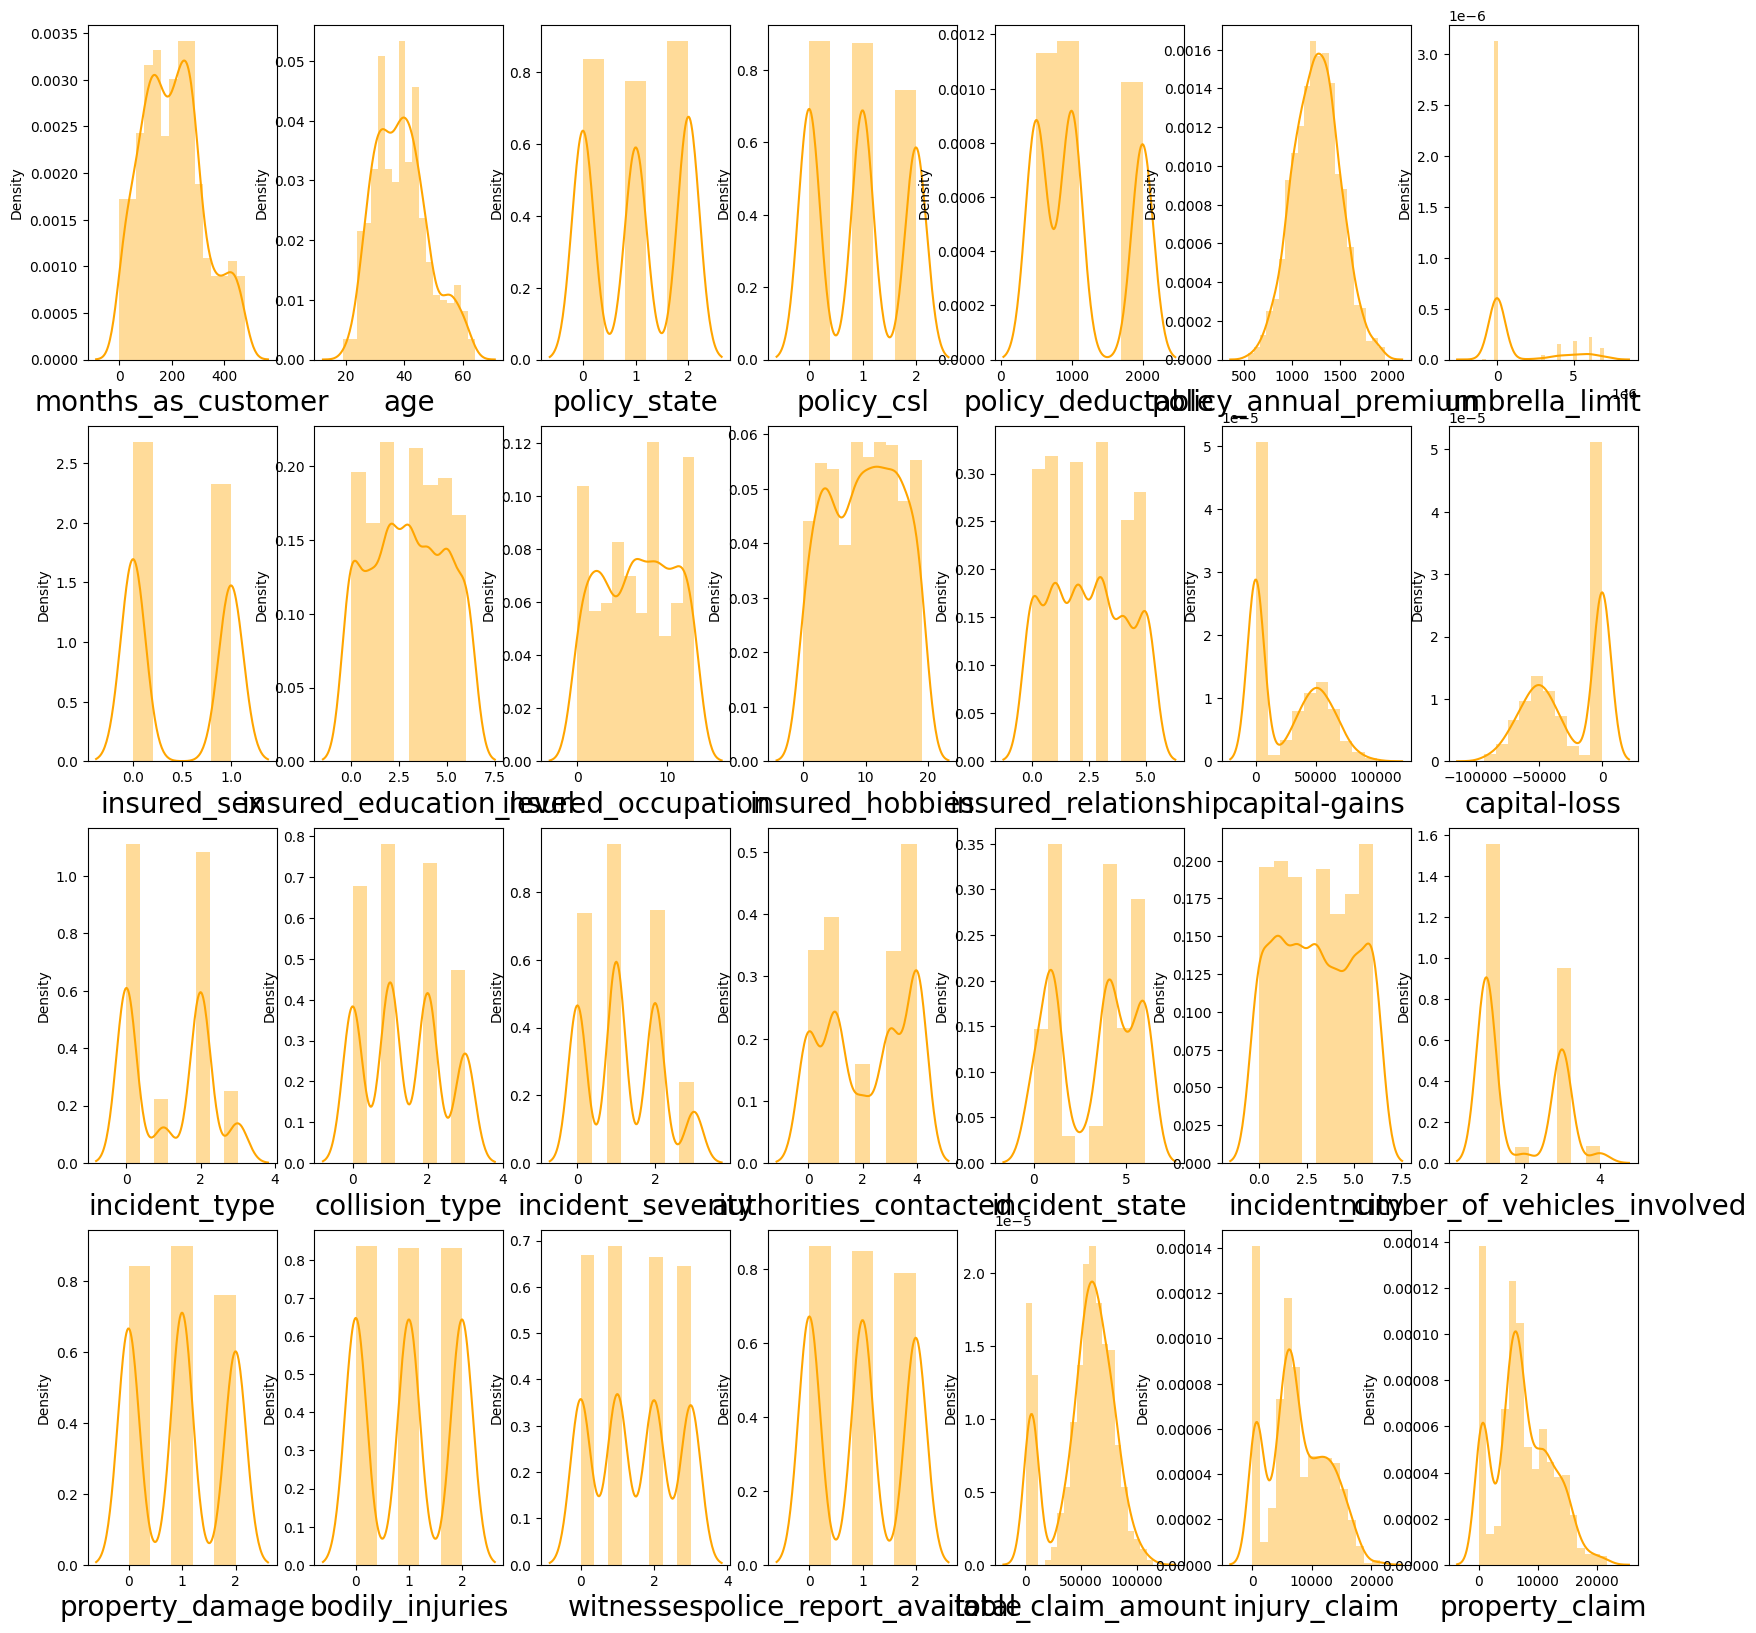

In [86]:
#checking how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,20))
plotnumber = 1

for column in data:
    if plotnumber<=28:
        ax = plt.subplot(4,7,plotnumber)
        sns.distplot(data[column],color='Orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Splitting Dependent and Independent Variable

In [87]:
features = data.drop("fraud_reported",axis=1)
target = data["fraud_reported"]

In [88]:
# scaling the features
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Features = pd.DataFrame(SC.fit_transform(features), columns=features.columns)

## Variance inflation factor (checking for multi-collinearity)

In [89]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(Features.values, i) 
               for i in range(Features.shape[1])], index=Features.columns)

months_as_customer             6.939471
age                            6.914836
policy_state                   1.027458
policy_csl                     1.029855
policy_deductable              1.036830
policy_annual_premium          1.030894
umbrella_limit                 1.036809
insured_sex                    1.025062
insured_education_level        1.042985
insured_occupation             1.020125
insured_hobbies                1.045791
insured_relationship           1.052389
capital-gains                  1.037491
capital-loss                   1.039063
incident_type                  5.236372
collision_type                 1.732661
incident_severity              1.203519
authorities_contacted          1.097949
incident_state                 1.049572
incident_city                  1.028910
number_of_vehicles_involved    5.163547
property_damage                1.034327
bodily_injuries                1.018995
witnesses                      1.045218
police_report_available        1.046904


### will remove Total claim amount causing Perfect multi collinearity

In [90]:
Features.drop('total_claim_amount',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(Features.values, i) 
               for i in range(Features.shape[1])], index=Features.columns)

months_as_customer             6.939471
age                            6.914836
policy_state                   1.027458
policy_csl                     1.029855
policy_deductable              1.036830
policy_annual_premium          1.030894
umbrella_limit                 1.036809
insured_sex                    1.025062
insured_education_level        1.042985
insured_occupation             1.020125
insured_hobbies                1.045791
insured_relationship           1.052389
capital-gains                  1.037491
capital-loss                   1.039063
incident_type                  5.236372
collision_type                 1.732661
incident_severity              1.203519
authorities_contacted          1.097949
incident_state                 1.049572
incident_city                  1.028910
number_of_vehicles_involved    5.163547
property_damage                1.034327
bodily_injuries                1.018995
witnesses                      1.045218
police_report_available        1.046904


In [91]:
# Checking for Imbalace in the data
round(target.value_counts(normalize=True) * 100, 2)

0    75.51
1    24.49
Name: fraud_reported, dtype: float64

In [92]:
# import library
from imblearn.over_sampling import SMOTE
import collections

smote = SMOTE()

# fit predictor and target variable
feature_smote, target_smote = smote.fit_resample(Features, target)

print('Original dataset shape', collections.Counter(target))
print('Resample dataset shape', collections.Counter(target_smote))

Original dataset shape Counter({0: 740, 1: 240})
Resample dataset shape Counter({1: 740, 0: 740})


# Machine Learning

In [93]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [94]:
# Model building and Evaluation (Function)

def Model_Building(Features,target,model):
  Maximum_Accuracy=0

  test_size=[0.2,0.25,0.3]
  for j in test_size:
    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                            random_state=i)
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=accuracy_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=accuracy_score(y_train,check)
            
        if acc>Maximum_Accuracy:
          Maximum_Accuracy=acc
          print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

## Logistic Regression

In [67]:
Model_Building(feature_smote, target_smote,LogisticRegression(solver="liblinear", random_state=1))

Test set accuracy 0.7567567567567568 Train set accuracy 0.754222972972973 Random state 0 test_size 0.2
Test set accuracy 0.7635135135135135 Train set accuracy 0.754222972972973 Random state 6 test_size 0.2
Test set accuracy 0.7736486486486487 Train set accuracy 0.75 Random state 11 test_size 0.2
Test set accuracy 0.7804054054054054 Train set accuracy 0.7432432432432432 Random state 22 test_size 0.2
Test set accuracy 0.8006756756756757 Train set accuracy 0.7440878378378378 Random state 86 test_size 0.2


Accuracy of Logistic Regression: 80.07%
              precision    recall  f1-score   support

           0       0.85      0.77      0.80       158
           1       0.76      0.84      0.80       138

    accuracy                           0.80       296
   macro avg       0.80      0.80      0.80       296
weighted avg       0.81      0.80      0.80       296



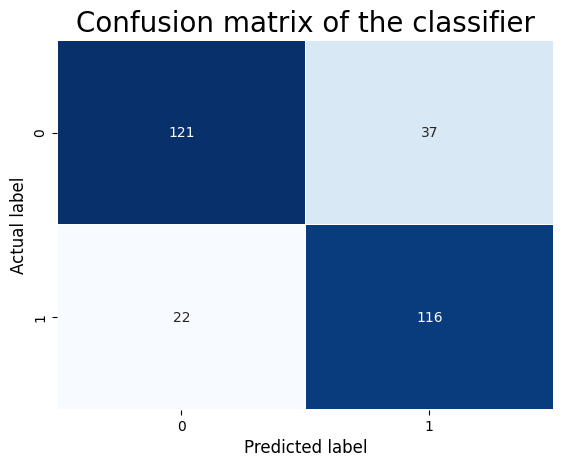

In [68]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.2,random_state=86)
LR =LogisticRegression(solver="liblinear", random_state=1)

LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)

# calculate accuracy score
LR_accuracy = accuracy_score(y_test, pred_LR)
print('Accuracy of Logistic Regression: {:.2f}%'.format(LR_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_LR)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
LR_pred_prob = LR.predict_proba(x_test)[:, 1]
LR_roc_auc = roc_auc_score(y_test, LR_pred_prob)

## Knn Classifier

In [70]:
Model_Building(feature_smote, target_smote,KNeighborsClassifier())

Test set accuracy 0.6621621621621622 Train set accuracy 0.7533783783783784 Random state 0 test_size 0.2
Test set accuracy 0.6858108108108109 Train set accuracy 0.745777027027027 Random state 1 test_size 0.2
Test set accuracy 0.6925675675675675 Train set accuracy 0.7474662162162162 Random state 4 test_size 0.2
Test set accuracy 0.7027027027027027 Train set accuracy 0.745777027027027 Random state 5 test_size 0.2
Test set accuracy 0.7162162162162162 Train set accuracy 0.7432432432432432 Random state 14 test_size 0.2
Test set accuracy 0.7263513513513513 Train set accuracy 0.7390202702702703 Random state 48 test_size 0.2


Accuracy of KNN CLASSIFIER: 72.64%
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       137
           1       0.67      0.97      0.79       159

    accuracy                           0.73       296
   macro avg       0.80      0.71      0.69       296
weighted avg       0.79      0.73      0.70       296



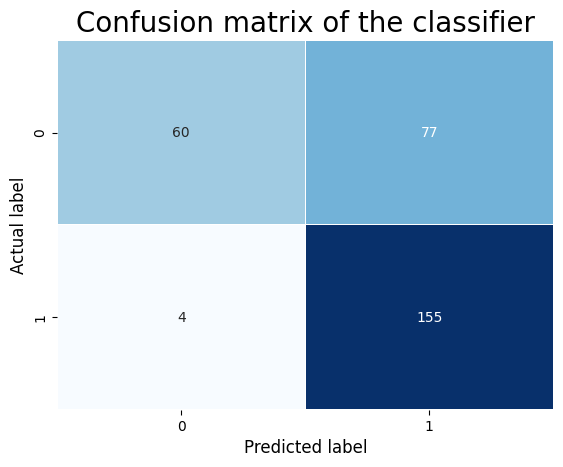

In [71]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.2,random_state=48)
KNN =KNeighborsClassifier()



KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

# calculate accuracy score
KNN_accuracy = accuracy_score(y_test, pred_KNN)
print('Accuracy of KNN CLASSIFIER: {:.2f}%'.format(KNN_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_KNN)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_KNN)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
KNN_pred_prob = KNN.predict_proba(x_test)[:, 1]
KNN_roc_auc = roc_auc_score(y_test, KNN_pred_prob)

## Naive Bayes Classifier

In [72]:
Model_Building(feature_smote, target_smote,GaussianNB())

Test set accuracy 0.7871621621621622 Train set accuracy 0.7297297297297297 Random state 0 test_size 0.2
Test set accuracy 0.7882882882882883 Train set accuracy 0.7181467181467182 Random state 22 test_size 0.3


Accuracy of GUSSIAN NAIVE BAYES: 78.83%
              precision    recall  f1-score   support

           0       0.86      0.69      0.76       220
           1       0.74      0.89      0.81       224

    accuracy                           0.79       444
   macro avg       0.80      0.79      0.79       444
weighted avg       0.80      0.79      0.79       444



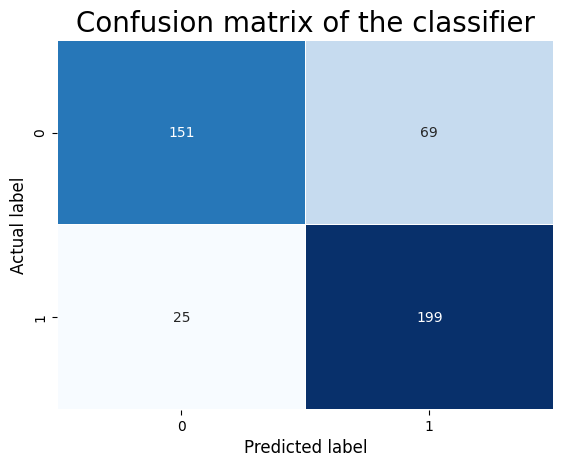

In [73]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.3,random_state=22)
GNB =GaussianNB()

GNB.fit(x_train, y_train)
pred_GNB = GNB.predict(x_test)

# calculate accuracy score
GNB_accuracy = accuracy_score(y_test, pred_GNB)
print('Accuracy of GUSSIAN NAIVE BAYES: {:.2f}%'.format(GNB_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_GNB)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_GNB)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
GNB_pred_prob = GNB.predict_proba(x_test)[:, 1]
GNB_roc_auc = roc_auc_score(y_test, GNB_pred_prob)

## Random Forest Classifier

In [74]:
Model_Building(feature_smote, target_smote,RandomForestClassifier(random_state=42))

Test set accuracy 0.918918918918919 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.9324324324324325 Train set accuracy 1.0 Random state 2 test_size 0.2
Test set accuracy 0.9425675675675675 Train set accuracy 1.0 Random state 69 test_size 0.2


Accuracy of RANDOM FOREST: 94.26%
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       156
           1       0.93      0.95      0.94       140

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



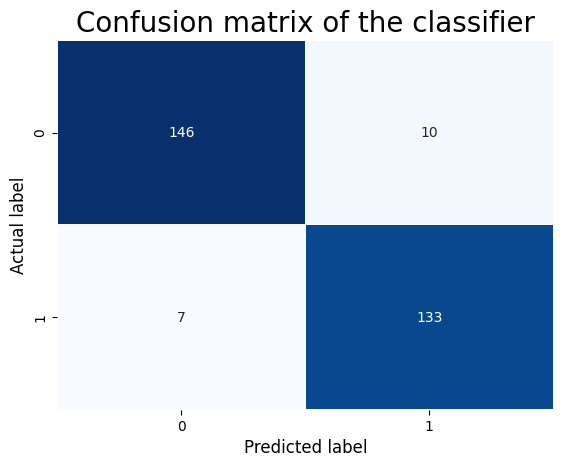

In [75]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.2,random_state=69)
RF =RandomForestClassifier(random_state=42)

RF.fit(x_train, y_train)
pred_RF = RF.predict(x_test)

# calculate accuracy score
RF_accuracy = accuracy_score(y_test, pred_RF)
print('Accuracy of RANDOM FOREST: {:.2f}%'.format(RF_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_RF)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
RF_pred_prob = RF.predict_proba(x_test)[:, 1]
RF_roc_auc = roc_auc_score(y_test, RF_pred_prob)

## Decision Tree classifier


In [76]:
Model_Building(feature_smote, target_smote,DecisionTreeClassifier(random_state=42))

Test set accuracy 0.8412162162162162 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.8513513513513513 Train set accuracy 1.0 Random state 2 test_size 0.2
Test set accuracy 0.8682432432432432 Train set accuracy 1.0 Random state 3 test_size 0.2
Test set accuracy 0.875 Train set accuracy 1.0 Random state 44 test_size 0.2
Test set accuracy 0.8817567567567568 Train set accuracy 1.0 Random state 89 test_size 0.2


Accuracy of DECISION TREE: 88.18%
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       146
           1       0.86      0.92      0.89       150

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



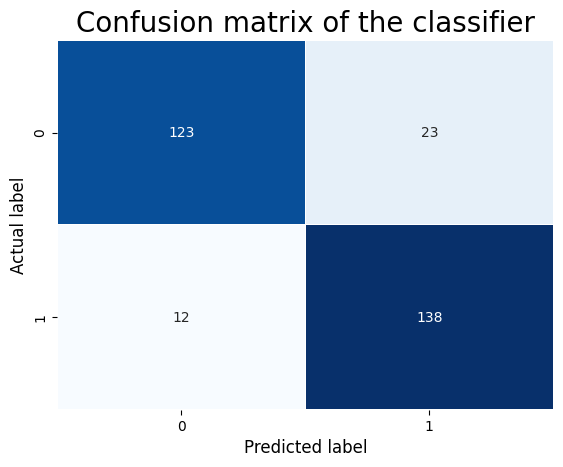

In [78]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.2,random_state=89)
DT =DecisionTreeClassifier(random_state=42)

DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)

# calculate accuracy score
DT_accuracy = accuracy_score(y_test, pred_DT)
print('Accuracy of DECISION TREE: {:.2f}%'.format(DT_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_DT)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_DT)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
DT_pred_prob = DT.predict_proba(x_test)[:, 1]
DT_roc_auc = roc_auc_score(y_test, DT_pred_prob)

## ADA Boost Classifier

In [79]:
Model_Building(feature_smote, target_smote,AdaBoostClassifier())

Test set accuracy 0.8851351351351351 Train set accuracy 0.9011824324324325 Random state 0 test_size 0.2
Test set accuracy 0.8885135135135135 Train set accuracy 0.8910472972972973 Random state 2 test_size 0.2
Test set accuracy 0.8918918918918919 Train set accuracy 0.8851351351351351 Random state 4 test_size 0.2
Test set accuracy 0.902027027027027 Train set accuracy 0.8918918918918919 Random state 9 test_size 0.2
Test set accuracy 0.9222972972972973 Train set accuracy 0.8927364864864865 Random state 19 test_size 0.2


Accuracy of ADA BOOST CLASSIFIER: 92.23%
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       145
           1       0.92      0.93      0.92       151

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



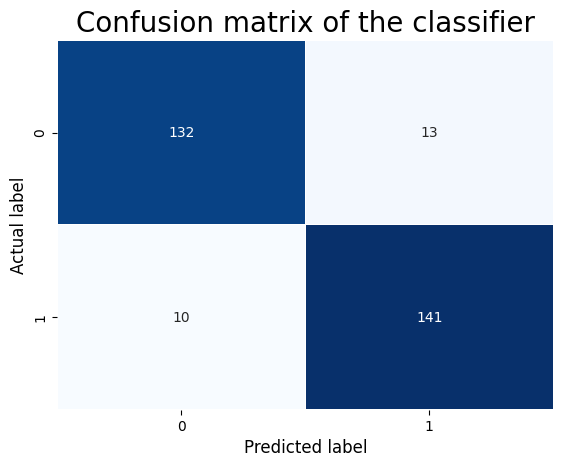

In [80]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.2,random_state=19)
ADA =AdaBoostClassifier()

ADA.fit(x_train, y_train)
pred_ADA = ADA.predict(x_test)

# calculate accuracy score
ADA_accuracy = accuracy_score(y_test, pred_ADA)
print('Accuracy of ADA BOOST CLASSIFIER: {:.2f}%'.format(ADA_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_ADA)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_ADA)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
ADA_pred_prob = ADA.predict_proba(x_test)[:, 1]
ADA_roc_auc = roc_auc_score(y_test, ADA_pred_prob)

## SUPPORT VECTOR CLASSIFIER

In [81]:
Model_Building(feature_smote, target_smote,SVC())

Test set accuracy 0.8682432432432432 Train set accuracy 0.956081081081081 Random state 0 test_size 0.2
Test set accuracy 0.8918918918918919 Train set accuracy 0.950168918918919 Random state 2 test_size 0.2
Test set accuracy 0.8986486486486487 Train set accuracy 0.9603040540540541 Random state 9 test_size 0.2


Accuracy of SUPPORT VECTOR MACHINE: 89.86%
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       145
           1       0.88      0.93      0.90       151

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



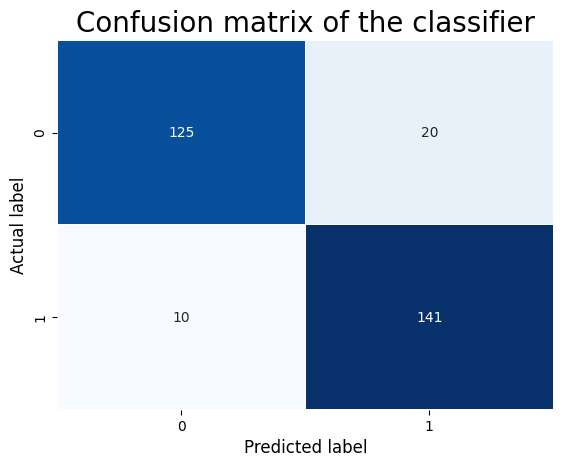

In [82]:
# make predictions
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote ,test_size=0.2,random_state=9)
SVM =SVC()

SVM.fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)

# calculate accuracy score
SVM_accuracy = accuracy_score(y_test, pred_SVM)
print('Accuracy of SUPPORT VECTOR MACHINE: {:.2f}%'.format(SVM_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_SVM)
print(report)
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_SVM)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

## SVM DOESNOT SUPPORT AUC CURVE

## Comparision by Roc_Auc curve

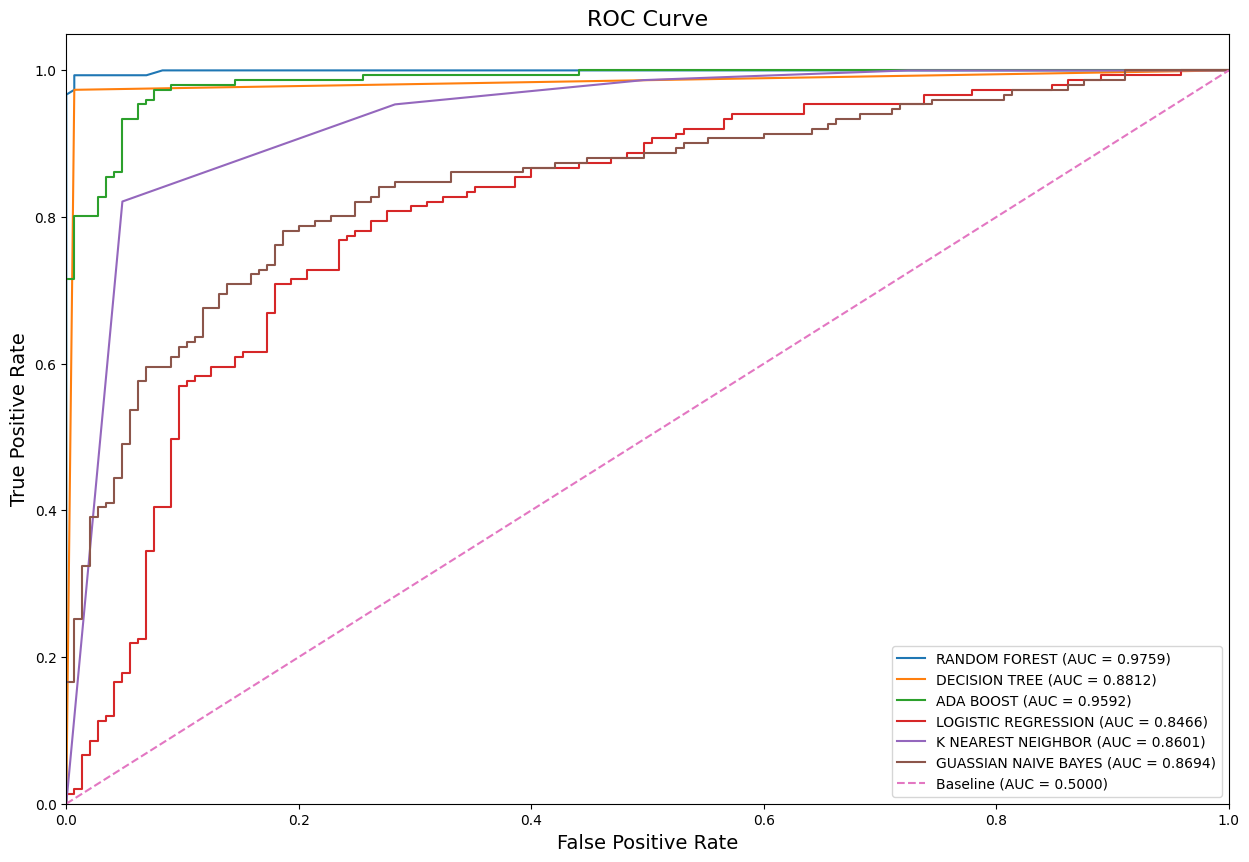

In [83]:

# create ROC curves

from sklearn.metrics import roc_curve
## RANDOM FOREST
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(x_test)[:,1])

## DECISION TREE
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT.predict_proba(x_test)[:,1])

## ADA BOOST
ADA_fpr, ADA_tpr, ADA_thresholds = roc_curve(y_test, ADA.predict_proba(x_test)[:,1])

## LOGISTIC REGRESSION
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

## K NEAREST NEIGHBOUR
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN.predict_proba(x_test)[:,1])

## GUASSIAN NAIVE BAYES 
GNB_fpr, GNB_tpr, GNB_thresholds = roc_curve(y_test, GNB.predict_proba(x_test)[:,1])

plt.figure(figsize=(15, 10))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="RANDOM FOREST (AUC = {:1.4f})".format(RF_roc_auc))
plt.plot(DT_fpr, DT_tpr, label="DECISION TREE (AUC = {:1.4f})".format(DT_roc_auc))
plt.plot(ADA_fpr, ADA_tpr, label="ADA BOOST (AUC = {:1.4f})".format(ADA_roc_auc))
plt.plot(LR_fpr, LR_tpr, label="LOGISTIC REGRESSION (AUC = {:1.4f})".format(LR_roc_auc))
plt.plot(KNN_fpr, KNN_tpr, label="K NEAREST NEIGHBOR (AUC = {:1.4f})".format(KNN_roc_auc))
plt.plot(GNB_fpr, GNB_tpr, label="GUASSIAN NAIVE BAYES (AUC = {:1.4f})".format(GNB_roc_auc))

# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

# AS RANDOM FOREST has the maximum auc_score we will perform hyper parametric tunning to get better result on it
## Hyper Parametric Tuning
### Random Forest

In [95]:
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.2,random_state=69)
rf = RandomForestClassifier(random_state=5)

param_grid = {
              'bootstrap': [True, False],
              'max_depth': [30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200,150,250]
              }

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv=5)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_


print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)

best estimator: RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=250, random_state=5)
best params: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
best score: 0.8826003003647285


In [100]:
x_train, x_test, y_train, y_test = train_test_split(feature_smote, target_smote, test_size=0.2,random_state=69)
rf = RandomForestClassifier(random_state=5)

param_grid = {
              'bootstrap': [False],
              'max_depth': [30],
              'max_features': ['auto'],
              'min_samples_leaf': [2],
              'min_samples_split': [5],
              'n_estimators': [250]
              }

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv=5)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_


print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)

best estimator: RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=250, random_state=5)
best params: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
best score: 0.8826003003647285


In [101]:
# make predictions

pred_rf = grid_rf.predict(x_test)

# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier: {:.2f}%'.format(logit_accuracy*100))

#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_rf)
print(report)

Accuracy of Random Forest Classifier: 89.86%
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       156
           1       0.91      0.87      0.89       140

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



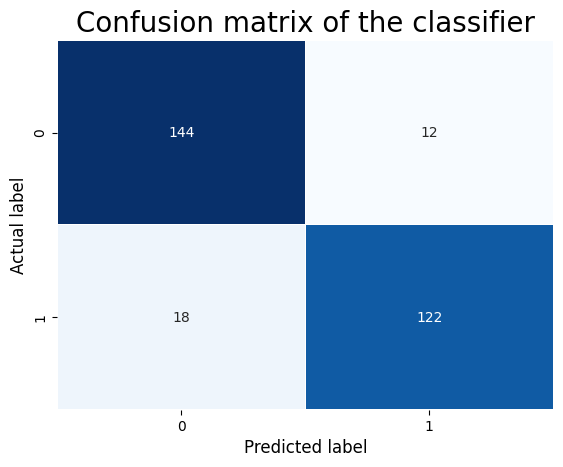

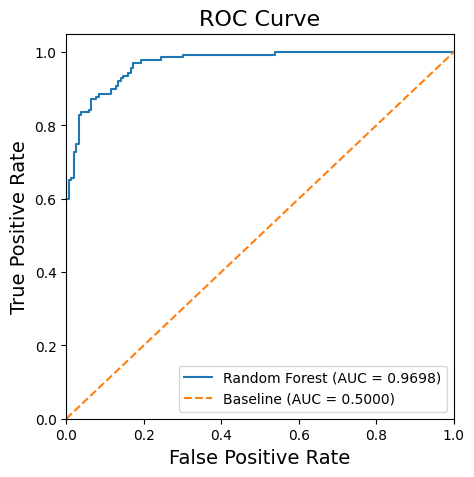

In [102]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()
y_pred_prob = grid_rf.predict_proba(x_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)
# create ROC curves

from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(5, 5))

# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Creating a pickle file

In [104]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("Insurance_fraud_prediction.pkl","wb") # name of my pickle file , wb -write
pickle.dump(grid_rf, pickle_out)
pickle_out.close()

# loading the pickeled model
pickle_in = open("Insurance_fraud_prediction.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0    1    2    3    4    5    6    7    8    9    ...  286  287  \
Predicted    1    1    1    0    0    0    1    0    0    1  ...    1    0   
Original     1    1    0    0    0    1    1    0    0    1  ...    1    1   

           288  289  290  291  292  293  294  295  
Predicted    1    0    0    0    0    1    0    0  
Original     1    0    0    0    0    1    0    0  

[2 rows x 296 columns]

## Completed case study of Insurance _fraud